In [1]:
import netCDF4
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
filename = "/Users/mgjeon/workspace/12673_20170906_000000.nc"

In [3]:
nc = netCDF4.Dataset(filename, 'r')

In [4]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    NOAA: 12673
    year_month_day_time: 2017_9_6_0
    project: ISEE Database for Nonlinear Force-Free Field of Solar Active Region
    production_date: 2023-03-22
    version: v1.2
    data_doi: 10.34515/DATA.HSC-00000
    http_link: https://hinode.isee.nagoya-u.ac.jp/nlfff_database/
    Distributor: Hinode Science Center, Institute for Space-Earth Environmental Research, Nagoya University
    dimensions(sizes): x(513), y(257), z(257)
    variables(dimensions): float64 x(x), float64 y(y), float64 z(z), float64 Bx(z, y, x), float64 By(z, y, x), float64 Bz(z, y, x), float64 Bx_pot(z, y, x), float64 By_pot(z, y, x), float64 Bz_pot(z, y, x)
    groups: 

In [5]:
x = np.array(nc.variables['x'])
y = np.array(nc.variables['y'])
z = np.array(nc.variables['z'])

Bx = np.array(nc.variables['Bx']).transpose(2, 1, 0)
By = np.array(nc.variables['By']).transpose(2, 1, 0)
Bz = np.array(nc.variables['Bz']).transpose(2, 1, 0)

In [6]:
dx = np.diff(x)[0]
dy = np.diff(y)[0]
dz = np.diff(z)[0]

dx, dy, dz

(0.48969578700000227, 0.6377433539999942, 0.637743354)

In [12]:
def plot_samples(array1, array2, h):
    fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=3)
    ax[0].plot(array1[:, h, h])
    ax[0].plot(array2[:, h, h], '--')
    ax[1].plot(array1[h, :, h])
    ax[1].plot(array2[h, :, h], '--')
    ax[2].plot(array1[h, h, :])
    ax[2].plot(array2[h, h, :], '--')

def allclose_internal(array1, array2, h):
    """
    check two arrays are equal to each other
    ignoring boundary of width 'h'
    """
    if h == 0:
        array1_h = array1 
        array2_h = array2 
    elif h > 0:
        array1_h = array1[h:-h, h:-h, h:-h]
        array2_h = array2[h:-h, h:-h, h:-h]
    return np.allclose(array1_h, array2_h)

def compare(array1, array2, hh, h):
    plot_samples(array1, array2, hh)
    print(allclose_internal(array1, array2, h))

In [9]:
from tool.evaluate import *
from findiff import FinDiff

True


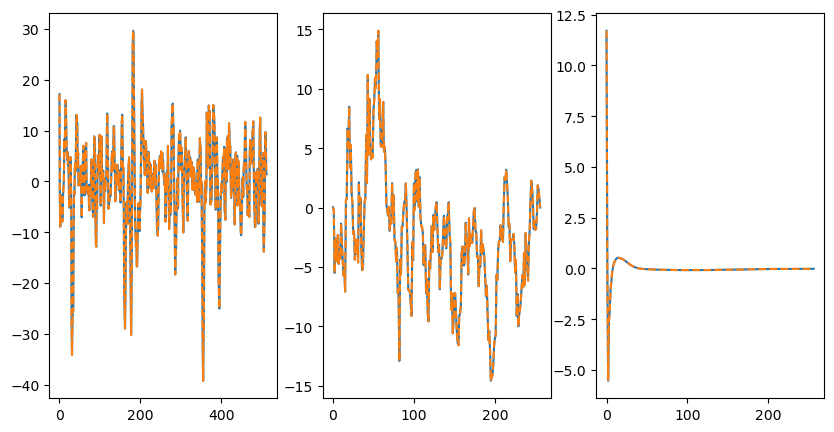

In [14]:
dBx_dx_tool_evaluate = Dx(Bx, dx)

d_dx = FinDiff(0, dx, 1, acc=2)
dBx_dx_findiff = d_dx(Bx)

hh = 3
h = 0
compare(dBx_dx_tool_evaluate, dBx_dx_findiff, hh, h)

True


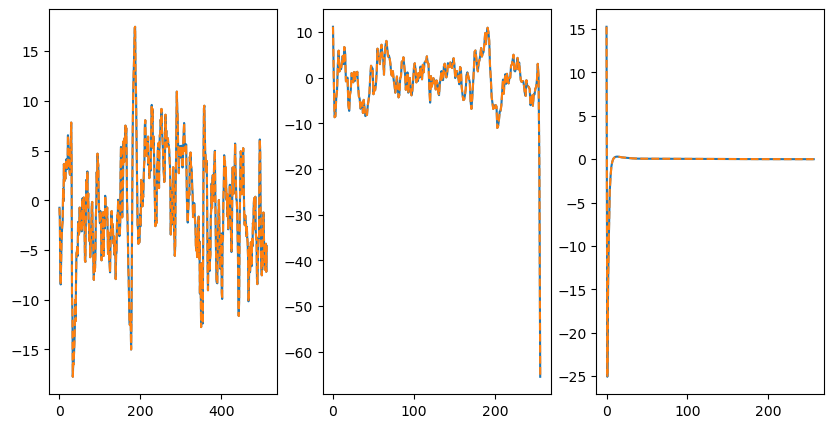

In [15]:
dBx_dy_tool_evaluate = Dy(Bx, dy)

d_dy = FinDiff(1, dy, 1, acc=2)
dBx_dy_findiff = d_dy(Bx)

hh = 3
h = 0
compare(dBx_dy_tool_evaluate, dBx_dy_findiff, hh, h)

True


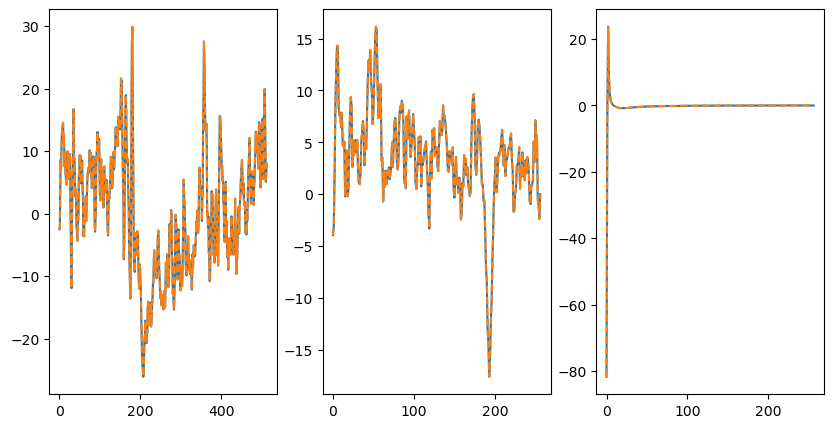

In [16]:
dBx_dz_tool_evaluate = Dz(Bx, dz)

d_dz = FinDiff(2, dz, 1, acc=2)
dBx_dz_findiff = d_dz(Bx)

hh = 3
h = 0
compare(dBx_dz_tool_evaluate, dBx_dz_findiff, hh, h)

True


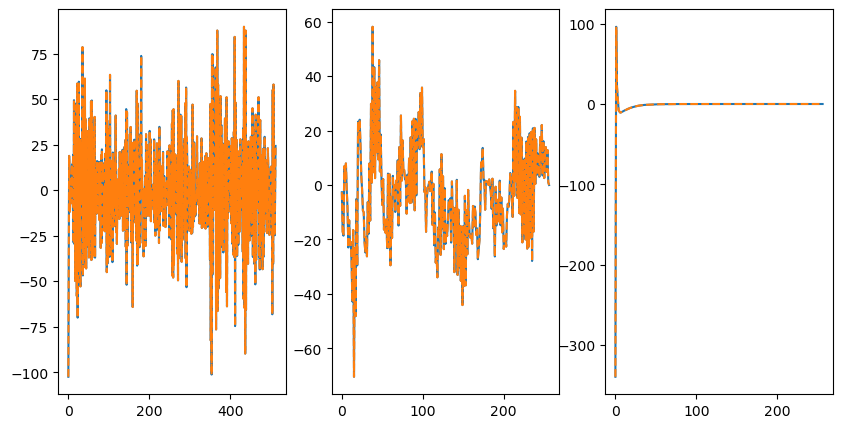

In [17]:
d2Bx_dx2_tool_evaluate = DDx(Bx, dx)

d2_dx2 = FinDiff(0, dx, 2, acc=2)
d2Bx_dx2_findiff = d2_dx2(Bx)

hh = 3
h = 0
compare(d2Bx_dx2_tool_evaluate, d2Bx_dx2_findiff, hh, h)

True


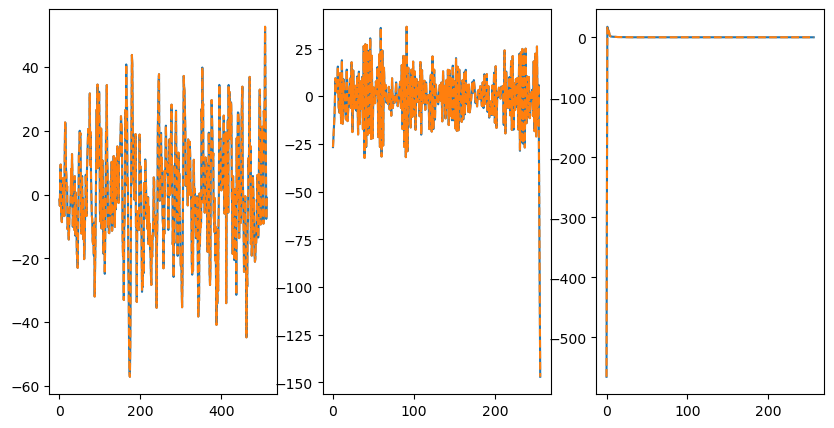

In [19]:
d2Bx_dy2_tool_evaluate = DDy(Bx, dy)

d2_dy2 = FinDiff(1, dy, 2, acc=2)
d2Bx_dy2_findiff = d2_dy2(Bx)

hh = 3
h = 0
compare(d2Bx_dy2_tool_evaluate, d2Bx_dy2_findiff, hh, h)

True


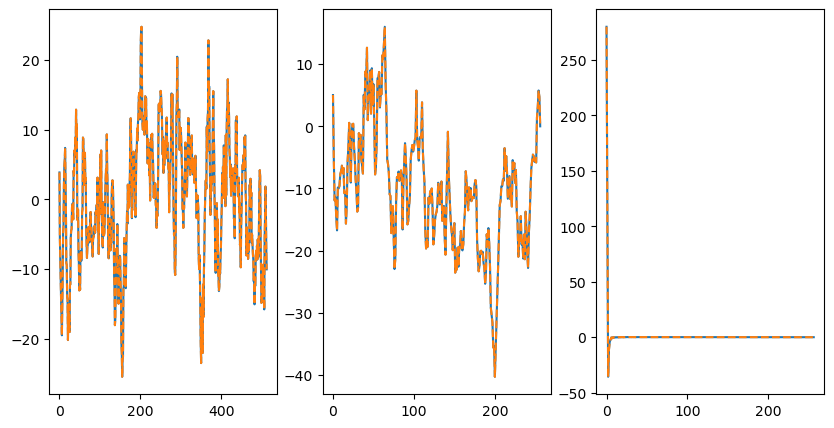

In [20]:
d2Bx_dz2_tool_evaluate = DDz(Bx, dz)

d2_dz2 = FinDiff(2, dy, 2, acc=2)
d2Bx_dz2_findiff = d2_dz2(Bx)

hh = 3
h = 0
compare(d2Bx_dz2_tool_evaluate, d2Bx_dz2_findiff, hh, h)

In [21]:
def find_max_within(array_3d, h):
    
    if h == 0:
        array_h = array_3d
    elif h > 0:
        array_h = array_3d[h:-h, h:-h, h:-h]
    
    max_idx = np.unravel_index(np.argmax(array_h), array_h.shape)
    # print(max_idx, array_h[max_idx], np.max(array_h))
    max_idx = tuple(np.array(max_idx) + h)
    print(max_idx, array_3d[max_idx], np.max(array_h))

In [25]:
h = 2

find_max_within(d2Bx_dz2_tool_evaluate, h)
find_max_within(d2Bx_dz2_findiff, h)

(196, 135, 2) 1046.5018744975039 1046.5018744975039
(196, 135, 2) 1046.501874497523 1046.501874497523


In [26]:
from findiff import Divergence, Laplacian, Gradient, Curl

True


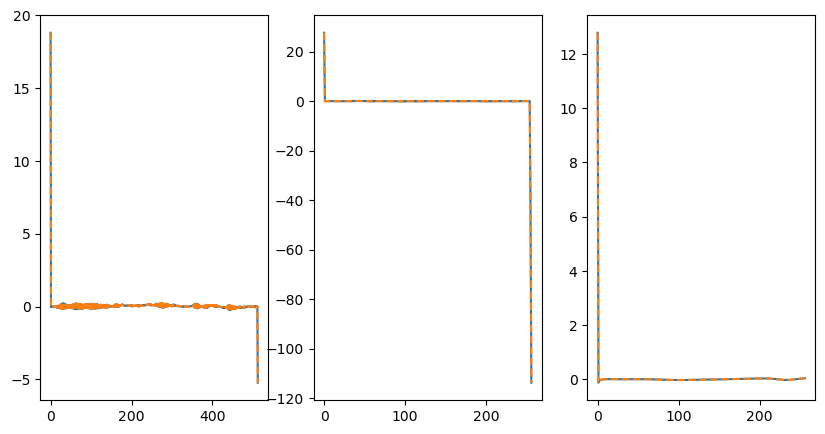

In [27]:
div_B_tool_evaluate = divergence(Bx, By, Bz, dx, dy, dz)

div = Divergence(h=[dx, dy, dz])
div_B_findiff = div(np.stack([Bx, By, Bz]))

hh = 3
h = 0
compare(div_B_tool_evaluate, div_B_findiff, hh, h)

In [31]:
laplace_Bx_tool_evaluate = laplacian(Bx, dx, dy, dz)
laplace_By_tool_evaluate = laplacian(By, dx, dy, dz)
laplace_Bz_tool_evaluate = laplacian(Bz, dx, dy, dz)

laplace = Laplacian(h=[dx, dy, dz])
laplace_Bx_findiff = laplace(Bx)
laplace_By_findiff = laplace(By)
laplace_Bz_findiff = laplace(Bz)

True
True
True


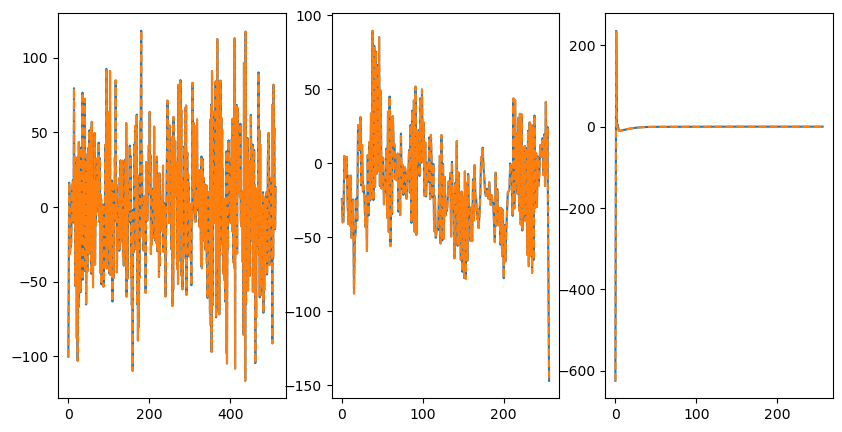

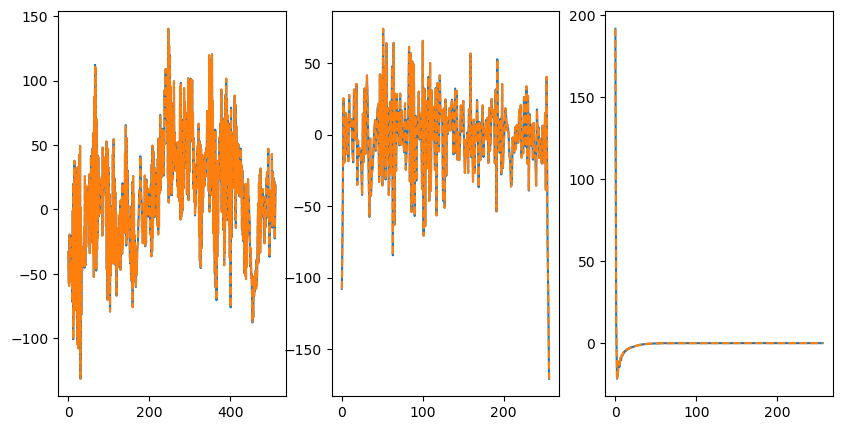

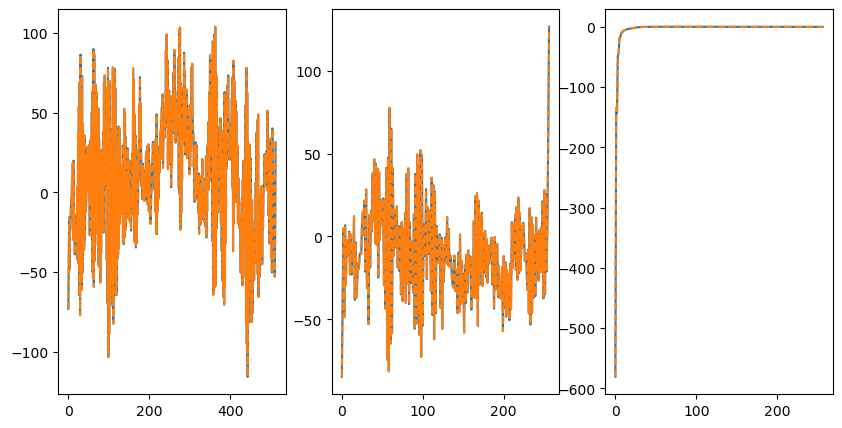

In [30]:
hh = 3
h = 0

compare(laplace_Bx_tool_evaluate, laplace_Bx_findiff, hh, h)
compare(laplace_By_tool_evaluate, laplace_By_findiff, hh, h)
compare(laplace_Bz_tool_evaluate, laplace_Bz_findiff, hh, h)

In [32]:
laplace_B_tool_evaluate = np.stack([laplace_Bx_tool_evaluate, laplace_By_tool_evaluate, laplace_Bz_tool_evaluate])
laplace_B_tool_evaluate.shape

(3, 513, 257, 257)

In [33]:
laplace_B_findiff = np.stack([laplace_Bx_findiff, laplace_By_findiff, laplace_Bz_findiff])
laplace_B_findiff.shape

(3, 513, 257, 257)

True
True
True


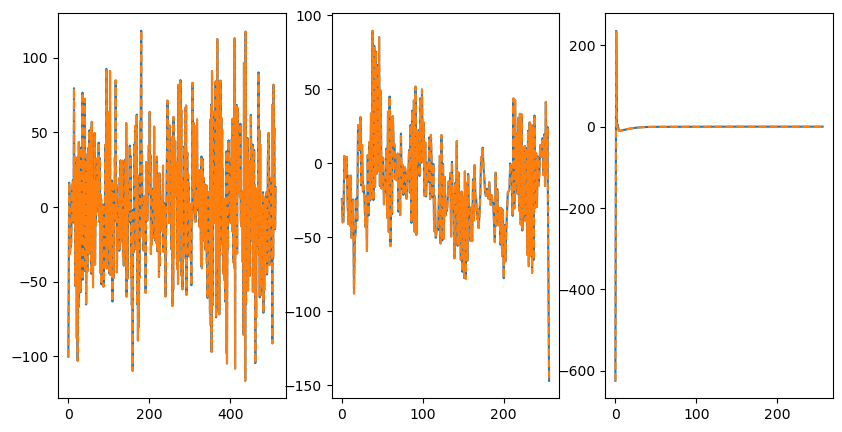

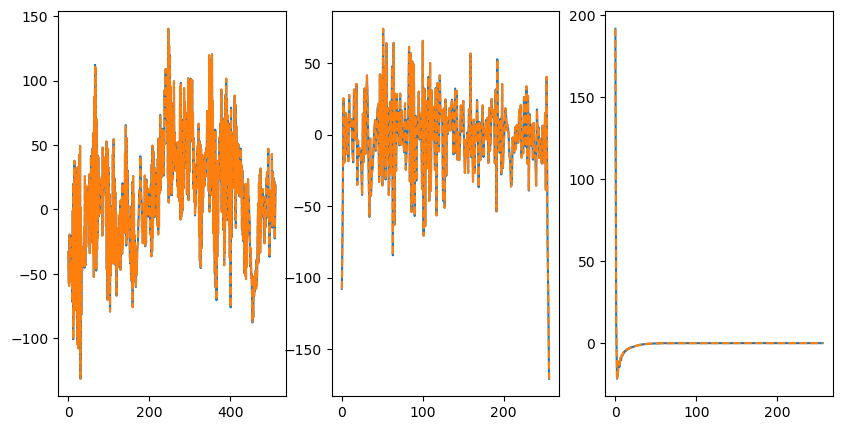

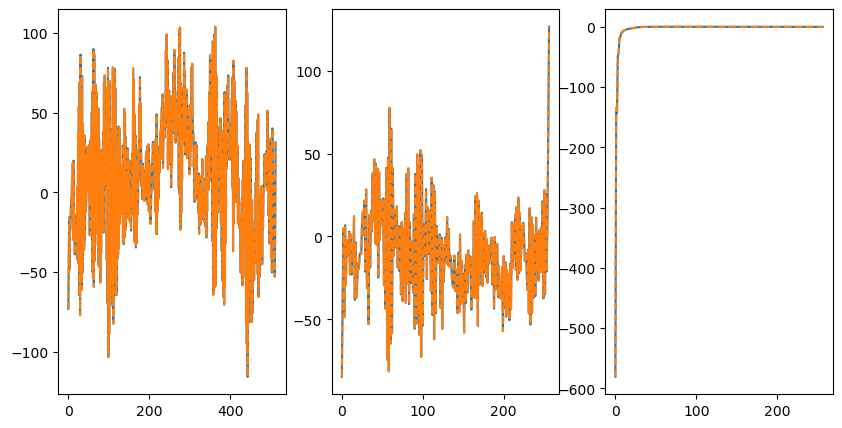

In [35]:
hh = 3
h = 0

for idx in range(3):
    compare(laplace_B_tool_evaluate[idx], laplace_B_findiff[idx], hh, h)

True


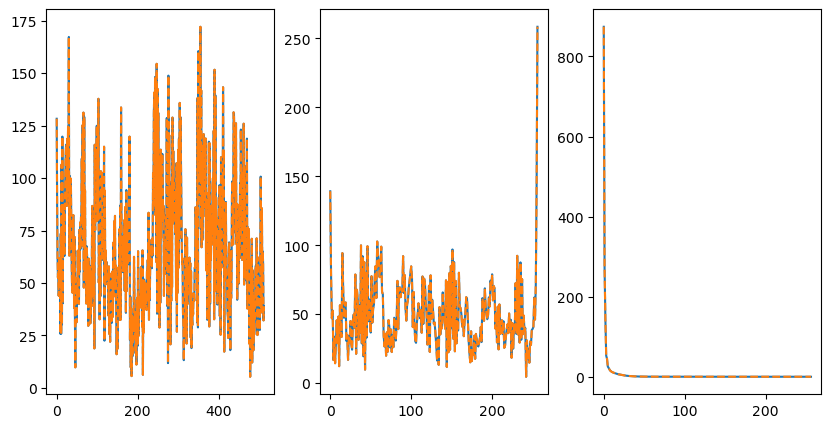

In [36]:
magnitude_laplace_B_tool_evalute = np.linalg.norm(laplace_B_tool_evaluate, axis=0)
magnitude_laplace_B_tool_evalute_manual = np.sqrt(np.sum(laplace_B_tool_evaluate**2, axis=0))

hh = 3
h = 0
compare(magnitude_laplace_B_tool_evalute, magnitude_laplace_B_tool_evalute_manual, hh, h)

True


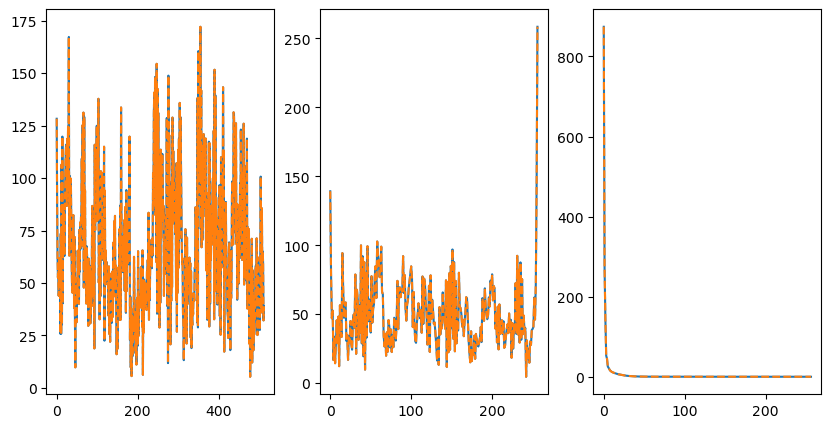

In [38]:
magnitude_laplace_B_tool_evalute = np.linalg.norm(laplace_B_tool_evaluate, axis=0)
magnitude_laplace_B_findiff = np.linalg.norm(laplace_B_findiff, axis=0)

hh = 3
h = 0
compare(magnitude_laplace_B_tool_evalute, magnitude_laplace_B_findiff, hh, h)

In [45]:
h = 0

find_max_within(magnitude_laplace_B_tool_evalute, h)
find_max_within(magnitude_laplace_B_findiff, h)

(195, 137, 0) 26593.181247839875 26593.181247839875
(195, 137, 0) 26593.181247839875 26593.181247839875


In [48]:
gradient_Bx_tool_evaluate = gradient(Bx, dx, dy, dz)
gradient_By_tool_evaluate = gradient(By, dx, dy, dz)
gradient_Bz_tool_evaluate = gradient(Bz, dx, dy, dz)

grad = Gradient(h=[dx, dy, dz])
gradient_Bx_findiff = grad(Bx)
gradient_By_findiff = grad(By)
gradient_Bz_findiff = grad(Bz)

True
True
True


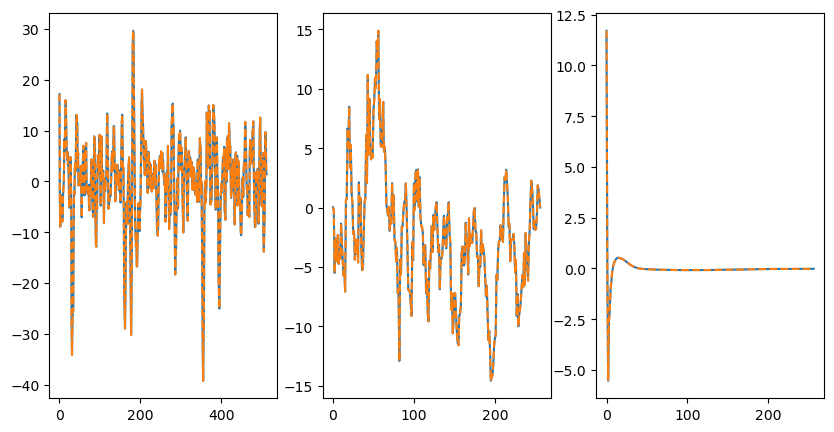

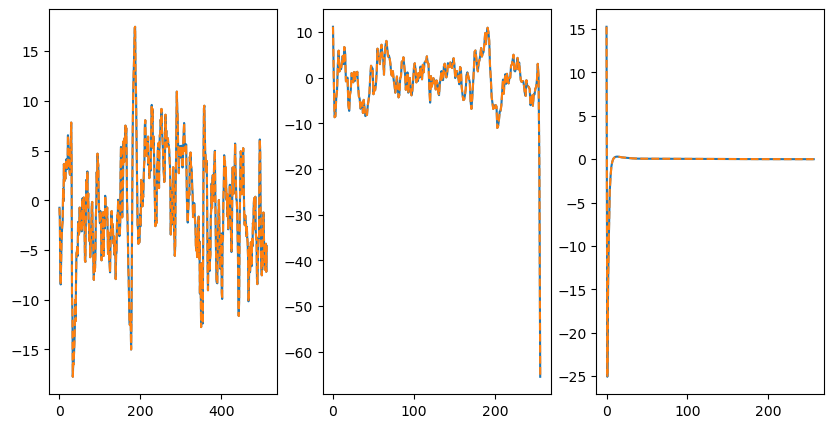

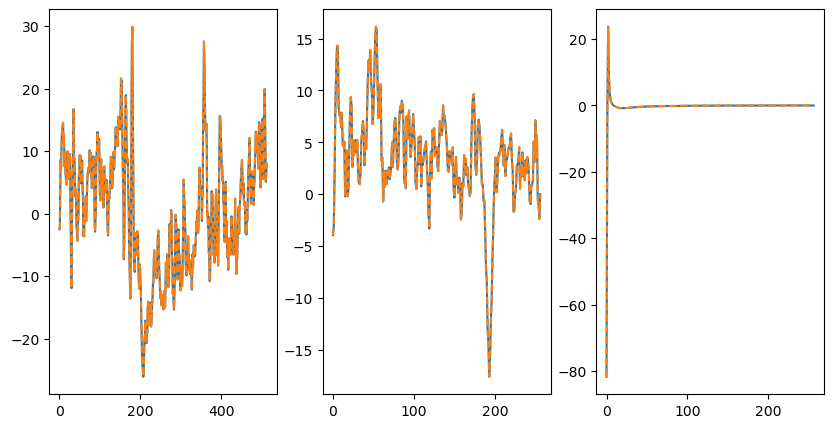

In [49]:
hh = 3
h = 0

for idx in range(3):
    compare(gradient_Bx_tool_evaluate[idx], gradient_Bx_findiff[idx], hh, h)

True
True
True


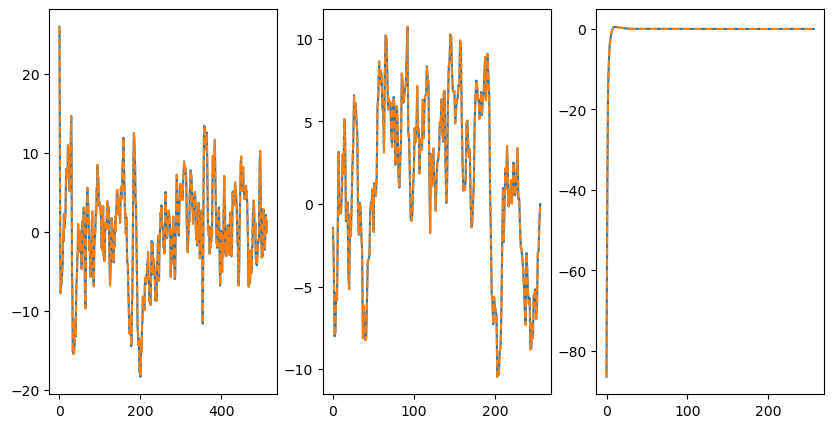

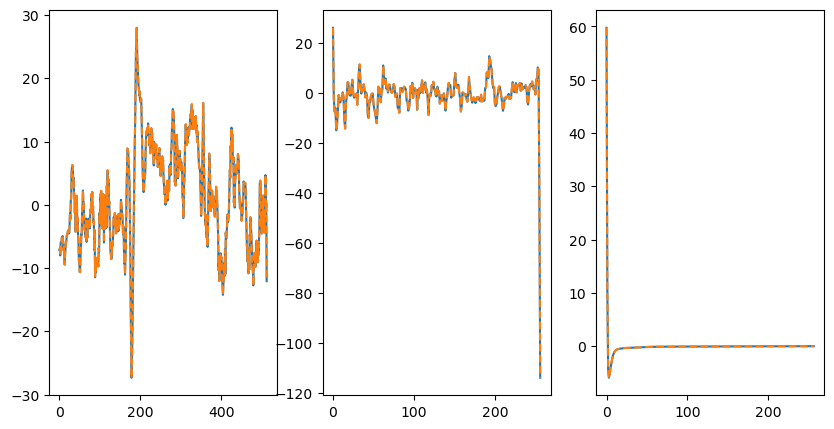

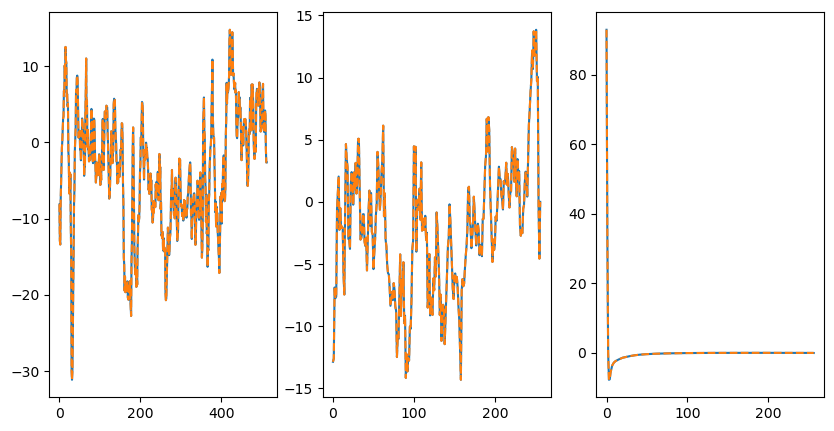

In [50]:
hh = 3
h = 0

for idx in range(3):
    compare(gradient_By_tool_evaluate[idx], gradient_By_findiff[idx], hh, h)

True
True
True


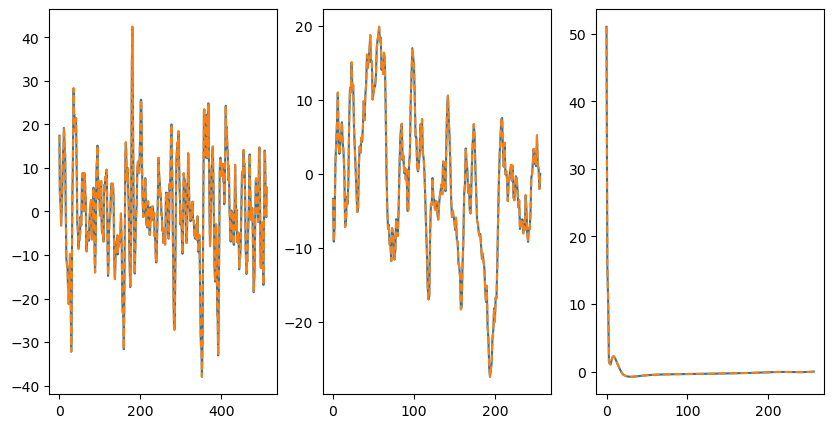

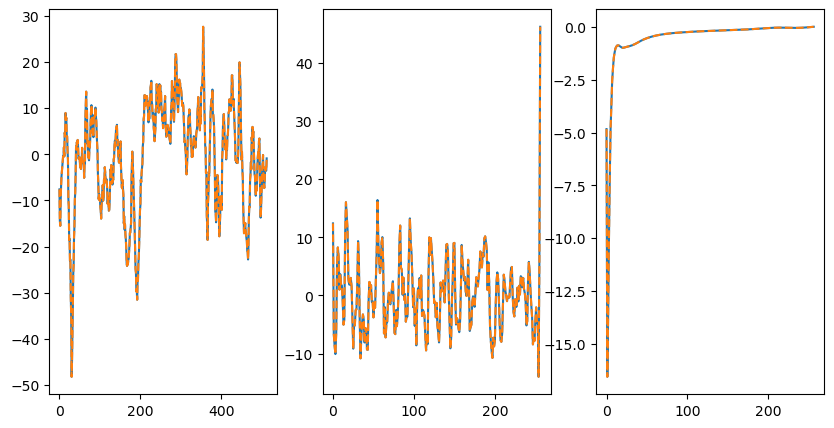

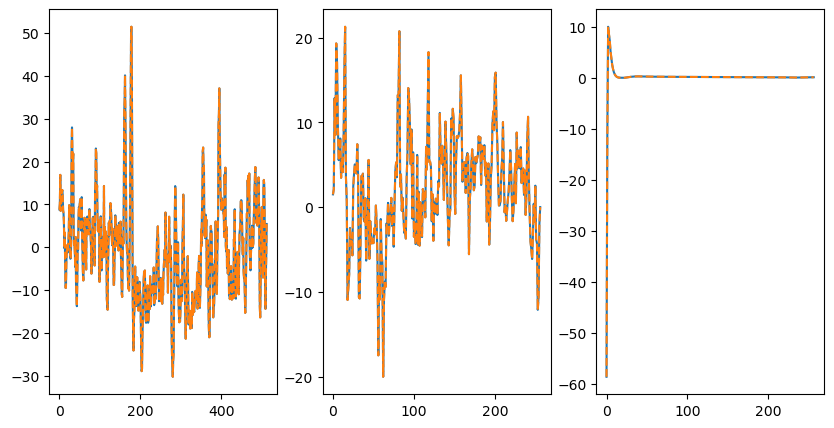

In [51]:
hh = 3
h = 0

for idx in range(3):
    compare(gradient_Bz_tool_evaluate[idx], gradient_Bz_findiff[idx], hh, h)

True
True
True


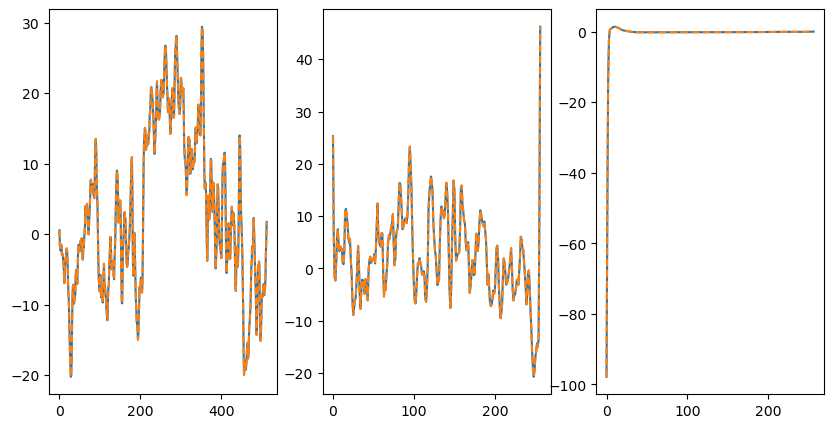

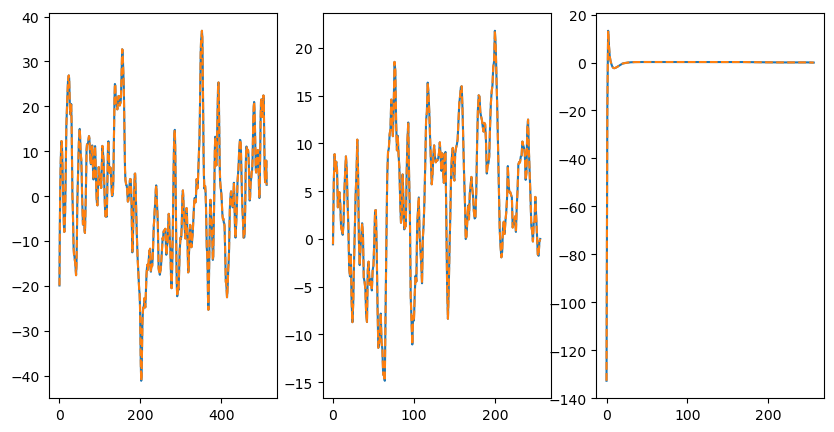

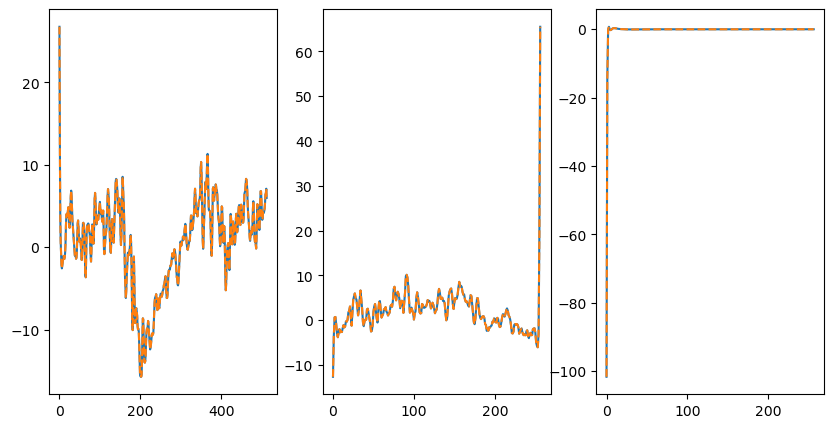

In [52]:
curl_B_tool_evaluate = curl(Bx, By, Bz, dx, dy, dz)

curl = Curl(h=[dx, dy, dz])
curl_B_findiff = curl(np.stack([Bx, By, Bz]))

hh = 3
h = 0
for idx in range(3):
    compare(curl_B_tool_evaluate[idx], curl_B_findiff[idx], hh, h)